# **Parte I: Analizando la base**

In [31]:
import os
import pandas as pd
ruta_archivo_excel = r'C:/Users/juanj/OneDrive/_propios/Documentos/A1/TPBD/usu_individual_T423.xlsx'
df = pd.read_excel('C:/Users/juanj/OneDrive/_propios/Documentos/A1/TPBD/usu_individual_T423.xlsx')
print(df.head())
filas, columnas = df.shape
print(f"La base de datos tiene {filas} filas y {columnas} columnas.")

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1    1   
1  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2    1   
2  TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           1    2   
3  TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           2    1   
4  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR       IPCF  \
0       1       S          32     1775  ...      NaN        5  225000.00   
1       1       S          32     1775  ...      NaN        5  225000.00   
2       1       S          32      609  ...      NaN       12       0.00   
3       1       S          32      609  ...      NaN       12       0.00   
4       1       S          32     3129  ...      NaN        8  266666.67   

   DECCFR  IDECCFR  RDECCFR  GDECCFR  PDECCFR  ADECCFR  

In [4]:
# (A)
# Los códigos para CABA y GBA son 32 y 33 respectivamente.
codigo_caba = 32
codigo_gba = 33

# Filtrar las observaciones
df_filtrado = df[df['AGLOMERADO'].isin([codigo_caba, codigo_gba])]

# Mostrar algunas filas del DataFrame filtrado para verificar
print(df_filtrado.head())

# Mostrar el número de filas y columnas del DataFrame filtrado
filas_filtradas, columnas_filtradas = df_filtrado.shape
print(f"La base de datos filtrada tiene {filas_filtradas} filas y {columnas_filtradas} columnas.")


                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1    1   
1  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2    1   
2  TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           1    2   
3  TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           2    1   
4  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR       IPCF  \
0       1       S          32     1775  ...      NaN        5  225000.00   
1       1       S          32     1775  ...      NaN        5  225000.00   
2       1       S          32      609  ...      NaN       12       0.00   
3       1       S          32      609  ...      NaN       12       0.00   
4       1       S          32     3129  ...      NaN        8  266666.67   

   DECCFR  IDECCFR  RDECCFR  GDECCFR  PDECCFR  ADECCFR  

In [5]:
#(B)
# Eliminar observaciones con ingresos negativos
df_filtrado = df_filtrado[df_filtrado['ITF'] >= 0]

# Eliminar observaciones con edades negativas
df_filtrado = df_filtrado[df_filtrado[' CH06'] >= 0]

# Mostrar el número de filas y columnas después de limpiar
print(f"Después de limpiar: {df_filtrado.shape}")

# Mostrar algunas filas del DataFrame limpiado para verificar
print(df_filtrado.head())


Después de limpiar: (7332, 177)
                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1    1   
1  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2    1   
2  TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           1    2   
3  TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           2    1   
4  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR       IPCF  \
0       1       S          32     1775  ...      NaN        5  225000.00   
1       1       S          32     1775  ...      NaN        5  225000.00   
2       1       S          32      609  ...      NaN       12       0.00   
3       1       S          32      609  ...      NaN       12       0.00   
4       1       S          32     3129  ...      NaN        8  266666.67   

   DECCFR  IDECCFR  RDEC

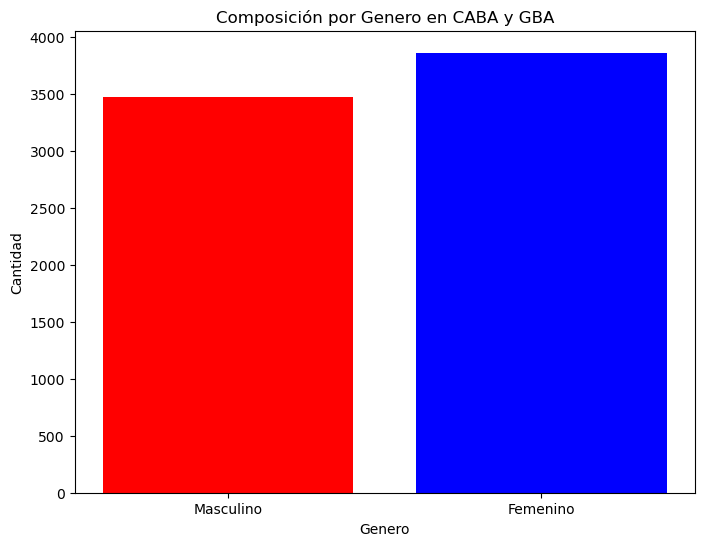

CH04
1    3470
2    3862
Name: count, dtype: int64


In [6]:
#(C)
import matplotlib.pyplot as plt
# Contar la cantidad de hombres y mujeres
# 'CH04' es la columna que contiene la información sobre el sexo (1 para masculino, 2 para femenino)
conteo_sexo = df_filtrado['CH04'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(conteo_sexo.index, conteo_sexo.values, color=['red', 'blue'], tick_label=['Masculino', 'Femenino'])
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.title('Composición por Genero en CABA y GBA')
plt.show()

# Mostrar el conteo de hombres y mujeres
print(conteo_sexo)


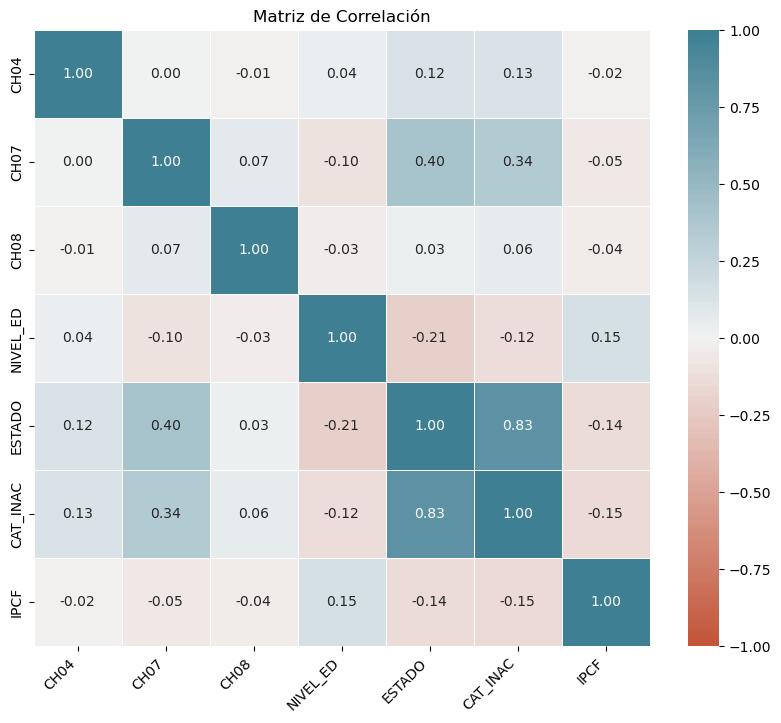

              CH04      CH07      CH08  NIVEL_ED    ESTADO  CAT_INAC      IPCF
CH04      1.000000  0.000501 -0.009665  0.037974  0.120873  0.128221 -0.022446
CH07      0.000501  1.000000  0.072854 -0.101498  0.399829  0.342766 -0.049593
CH08     -0.009665  0.072854  1.000000 -0.031640  0.026661  0.055910 -0.042539
NIVEL_ED  0.037974 -0.101498 -0.031640  1.000000 -0.214697 -0.118471  0.151536
ESTADO    0.120873  0.399829  0.026661 -0.214697  1.000000  0.827529 -0.138020
CAT_INAC  0.128221  0.342766  0.055910 -0.118471  0.827529  1.000000 -0.151449
IPCF     -0.022446 -0.049593 -0.042539  0.151536 -0.138020 -0.151449  1.000000


In [7]:
#(D)
import seaborn as sns
# Seleccionar las columnas relevantes para la matriz de correlación
columnas_relevantes = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
df_relevante = df_filtrado[columnas_relevantes]

# Calcular la matriz de correlación
matriz_correlacion = df_relevante.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    matriz_correlacion, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,  # Añade los valores de correlación en las celdas
    fmt='.2f',   # Formato de los números
    linewidths=0.5 # Ancho de las líneas que separan las celdas
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Matriz de Correlación')
plt.show()

# Mostrar la matriz de correlación
print(matriz_correlacion)


In [8]:
#(E)
# Contar el número de desocupados y de inactivos
# 1: Ocupado, 2: Desocupado, 3: Inactivo
ocupados = df_filtrado[df_filtrado['ESTADO'] == 1].shape[0]
desocupados = df_filtrado[df_filtrado['ESTADO'] == 2].shape[0]
inactivos = df_filtrado[df_filtrado['ESTADO'] == 3].shape[0]

print(f"Número de ocupados: {ocupados}")
print(f"Número de desocupados: {desocupados}")
print(f"Número de inactivos: {inactivos}")

# Calcular la media de ingreso per cápita familiar (IPCF) según estado
media_ipcf_por_estado = df_filtrado.groupby('ESTADO')['IPCF'].mean()

# Mostrar la media de IPCF según estado
print("Media de IPCF según estado:")
print(media_ipcf_por_estado)


Número de ocupados: 3490
Número de desocupados: 240
Número de inactivos: 2765
Media de IPCF según estado:
ESTADO
0         0.000000
1    132041.486499
2     58012.198417
3     84993.676882
4     75891.491137
Name: IPCF, dtype: float64


In [9]:
#Agregamos el archivo tabla adulto equiv.xlsx 
tabla_equiv = 'C:/Users/juanj/OneDrive/_propios/Documentos/A1/TPBD/tabla_adulto_equiv2.xlsx'
tabla = pd.read_excel(tabla_equiv)
print(tabla)

              Edad  Mujeres  Varones
0   Menor de 1 año     0.35     0.35
1             1año     0.37     0.37
2           2 años     0.46     0.46
3           3 años     0.51     0.51
4           4 años     0.55     0.55
5           5 años     0.60     0.60
6           6 años     0.64     0.64
7           7 años     0.66     0.66
8           8 años     0.68     0.68
9           9 años     0.69     0.69
10         10 años     0.70     0.79
11         11 años     0.72     0.82
12         12 años     0.74     0.85
13         13 años     0.76     0.90
14         14 años     0.76     0.96
15         15 años     0.77     1.00
16         16 años     0.77     1.03
17         17 años     0.77     1.04
18    18 a 29 años     0.76     1.02
19    30 a 45 años     0.77     1.00
20    46 a 60 años     0.76     1.00
21    61 a 75 años     0.67     0.83
22  más de 75 años     0.63     0.74


In [10]:
#(F)
import pandas as pd

# Leer los archivos Excel
usu_individual = pd.read_excel('C:/Users/juanj/OneDrive/_propios/Documentos/A1/TPBD/usu_individual_T423.xlsx')
tabla_adulto_equiv = pd.read_excel('C:/Users/juanj/OneDrive/_propios/Documentos/A1/TPBD/tabla_adulto_equiv2.xlsx')

# Eliminar los espacios adicionales en los nombres de las columnas
usu_individual.columns = usu_individual.columns.str.strip()

# Crear un diccionario para mapear los valores de adulto equivalente
equivalencias = {
    (row['Edad'], 'Mujeres'): row['Mujeres'] for idx, row in tabla_adulto_equiv.iterrows()
}
equivalencias.update({
    (row['Edad'], 'Varones'): row['Varones'] for idx, row in tabla_adulto_equiv.iterrows()
})

# Convertir la columna de edad en `usu_individual` para coincidir con el formato de `tabla_adulto_equiv`
usu_individual['Edad'] = usu_individual['CH06'].apply(lambda x: f"{x} años" if x > 0 else "Menor de 1 año")

# Asignar el valor de adulto equivalente con valores por defecto
def obtener_equivalente(row):
    if (row['Edad'], 'Mujeres' if row['CH04'] == 2 else 'Varones') in equivalencias:
        return equivalencias[(row['Edad'], 'Mujeres' if row['CH04'] == 2 else 'Varones')]
    else:
        return 1.0 if row['CH06'] > 18 else 0.5

usu_individual['adulto_equiv'] = usu_individual.apply(obtener_equivalente, axis=1)

# Sumar los valores de adulto_equiv para cada hogar
ad_equiv_hogar = usu_individual.groupby(['CODUSU', 'NRO_HOGAR'])['adulto_equiv'].sum().reset_index()

# Renombrar la columna
ad_equiv_hogar.rename(columns={'adulto_equiv': 'ad_equiv_hogar'}, inplace=True)

# Unir esta nueva columna con la tabla original `usu_individual`
usu_individual = usu_individual.merge(ad_equiv_hogar, on=['CODUSU', 'NRO_HOGAR'], how='left')

# Verificar los nombres de las columnas después de la unión
print(usu_individual.columns)

# Limpiar la duplicación de columnas si es necesario
if 'ad_equiv_hogar_x' in usu_individual.columns and 'ad_equiv_hogar_y' in usu_individual.columns:
    usu_individual = usu_individual.drop(columns=['ad_equiv_hogar_x']).rename(columns={'ad_equiv_hogar_y': 'ad_equiv_hogar'})

# Mostrar las primeras filas del DataFrame resultante
print(usu_individual[['CODUSU', 'NRO_HOGAR', 'CH04', 'CH06', 'Edad', 'adulto_equiv', 'ad_equiv_hogar']].head(20))



Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR',
       'PONDIH', 'Edad', 'adulto_equiv', 'ad_equiv_hogar'],
      dtype='object', length=180)
                           CODUSU  NRO_HOGAR  CH04  CH06     Edad  \
0   TQRMNOTUUHJMLPCDEIIAD00801670          1     1    76  76 años   
1   TQRMNOTUUHJMLPCDEIIAD00801670          1     2    79  79 años   
2   TQRMNOPUUHJKLQCDEIIAD00793187          1     1    65  65 años   
3   TQRMNOPUUHJKLQCDEIIAD00793187          1     2    66  66 años   
4   TQRMNOPUTHKLMNCDEIIAD00791268          1     2    49  49 años   
5   TQRMNOPUTHKLMNCDEIIAD00791268          1     1    20  20 años   
6   TQRMNOPUTHKLMNCDEIIAD00791268          1     1    17  17 años   
7   TQRMNORXPHKLMNCDEIIAD00791273          2     1    39  39 años   
8   TQRMNORXPHKLMNCDEIIAD00791273          2     1     5   5 años   
9   TQRM

In [11]:
# 3.
# Cuantas personas no respondieron cuál es su ingreso total familiar (ITF)
norespondieron = usu_individual[usu_individual['ITF'].isna() | (usu_individual['ITF'] == 0)]
respondieron = usu_individual[~usu_individual['ITF'].isna() & (usu_individual['ITF'] != 0)]

# Guardar las bases distintas
norespondieron.to_csv('norespondieron.csv', index=False)
respondieron.to_csv('respondieron.csv', index=False)

# Mostrar el número de personas que no respondieron
print(f"Cantidad de personas que no respondieron su ITF: {len(norespondieron)}")
print(f"Cantidad de personas que respondieron su ITF: {len(respondieron)}")


Cantidad de personas que no respondieron su ITF: 2979
Cantidad de personas que respondieron su ITF: 4401


In [12]:
# 4. 
import pandas as pd

# Cargar la base respondieron
respondieron = pd.read_csv('respondieron.csv', low_memory=False)

# Definir el valor de la Canasta Básica Total para un adulto equivalente
canasta_basica_total = 132853.3

# Calcular el ingreso necesario para cada hogar
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * canasta_basica_total

# Guardar la base actualizada
respondieron.to_csv('respondieron_actualizado.csv', index=False)

# Mostrar las primeras filas del DataFrame resultante para verificar
print(respondieron[['CODUSU', 'NRO_HOGAR', 'ad_equiv_hogar', 'ingreso_necesario']].head(20))



                           CODUSU  NRO_HOGAR  ad_equiv_hogar  \
0   TQRMNOTUUHJMLPCDEIIAD00801670          1            2.00   
1   TQRMNOTUUHJMLPCDEIIAD00801670          1            2.00   
2   TQRMNOPUTHKLMNCDEIIAD00791268          1            3.04   
3   TQRMNOPUTHKLMNCDEIIAD00791268          1            3.04   
4   TQRMNOPUTHKLMNCDEIIAD00791268          1            3.04   
5   TQRMNORXPHKLMNCDEIIAD00791273          2            1.60   
6   TQRMNORXPHKLMNCDEIIAD00791273          2            1.60   
7   TQRMNOSPTHKKMPCDEIIAD00791441          1            2.00   
8   TQRMNOSPTHKKMPCDEIIAD00791441          1            2.00   
9   TQRMNOQWYHLMKRCDEIJAH00854987          1            2.00   
10  TQRMNOQWYHLMKRCDEIJAH00854987          1            2.00   
11  TQRMNOPWXHJMLQCDEIJAH00794277          1            5.01   
12  TQRMNOPWXHJMLQCDEIJAH00794277          1            5.01   
13  TQRMNOPWXHJMLQCDEIJAH00794277          1            5.01   
14  TQRMNOPWXHJMLQCDEIJAH00794277       

In [13]:
# 5.
import pandas as pd

# Cargar la base respondieron actualizada
respondieron = pd.read_csv('respondieron_actualizado.csv', low_memory=False)

# Agregar la columna 'pobre'
respondieron['pobre'] = respondieron['ITF'] < respondieron['ingreso_necesario']

# Convertir los valores de True/False a 1/0
respondieron['pobre'] = respondieron['pobre'].astype(int)

# Contar el número de pobres identificados
num_pobres = respondieron['pobre'].sum()

# Guardar la base actualizada con la nueva columna
respondieron.to_csv('respondieron_con_pobre.csv', index=False)

# Mostrar las primeras filas del DataFrame resultante para verificar
print(respondieron[['CODUSU', 'NRO_HOGAR', 'ITF', 'ingreso_necesario', 'pobre']].head(20))

# Mostrar el número de pobres identificados
print(f"Número de pobres identificados: {num_pobres}")


                           CODUSU  NRO_HOGAR     ITF  ingreso_necesario  pobre
0   TQRMNOTUUHJMLPCDEIIAD00801670          1  450000         265706.600      0
1   TQRMNOTUUHJMLPCDEIIAD00801670          1  450000         265706.600      0
2   TQRMNOPUTHKLMNCDEIIAD00791268          1  800000         403874.032      0
3   TQRMNOPUTHKLMNCDEIIAD00791268          1  800000         403874.032      0
4   TQRMNOPUTHKLMNCDEIIAD00791268          1  800000         403874.032      0
5   TQRMNORXPHKLMNCDEIIAD00791273          2  420000         212565.280      0
6   TQRMNORXPHKLMNCDEIIAD00791273          2  420000         212565.280      0
7   TQRMNOSPTHKKMPCDEIIAD00791441          1  285000         265706.600      0
8   TQRMNOSPTHKKMPCDEIIAD00791441          1  285000         265706.600      0
9   TQRMNOQWYHLMKRCDEIJAH00854987          1  200000         265706.600      1
10  TQRMNOQWYHLMKRCDEIJAH00854987          1  200000         265706.600      1
11  TQRMNOPWXHJMLQCDEIJAH00794277          1  575000

# **Parte II: Clasificacion**

In [17]:
# 1.
import pandas as pd

# Cargar las bases de datos actualizadas
respondieron = pd.read_csv('respondieron_con_pobre.csv', low_memory=False)
norespondieron = pd.read_csv('norespondieron.csv', low_memory=False)

# Listas de variables a eliminar
ingreso_columns = [
    'P47T', 'P48T', 'P49T', 'P50T', 'P51T', 'P52T', 'P53T', 'P54T', 'P55T',
    'ITF', 'IPCF'
]
other_columns = ['adulto_equiv', 'ad_equiv_hogar', 'ingreso_necesario']

# Eliminar las variables relacionadas a ingresos y otras especificadas
respondieron.drop(columns=ingreso_columns + other_columns, inplace=True, errors='ignore')
norespondieron.drop(columns=ingreso_columns + other_columns, inplace=True, errors='ignore')

# Guardar las bases limpias
respondieron.to_csv('respondieron_limpio.csv', index=False)
norespondieron.to_csv('norespondieron_limpio.csv', index=False)

# Mostrar las primeras filas del DataFrame resultante para verificar
print(respondieron.head())
print(norespondieron.head())



                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1    1   
1  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2    1   
2  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1    1   
3  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           2    1   
4  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           3    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  ADECIFR  DECCFR IDECCFR  RDECCFR  \
0       1       S          32     1775  ...        5       8     NaN        8   
1       1       S          32     1775  ...        5       8     NaN        8   
2       1       S          32     3129  ...        8       9     NaN        8   
3       1       S          32     3129  ...        8       9     NaN        8   
4       1       S          32     3129  ...        8       9     NaN        8   

   GDECCFR  PDECCFR  ADECC

In [18]:
# 2.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Cargar la base de datos limpia
respondieron = pd.read_csv('respondieron_limpio.csv')


# Definir la variable dependiente y las variables independientes
X = respondieron.drop(columns=['pobre'])
y = respondieron['pobre']

# Agregar una columna de unos a X usando NumPy
X['intercept'] = np.ones(len(X))

# Dividir la base de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Mostrar las primeras filas de los conjuntos de entrenamiento y prueba para verificar
print("X_train:\n", X_train.head())
print("X_test:\n", X_test.head())
print("y_train:\n", y_train.head())
print("y_test:\n", y_test.head())



X_train:
                              CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
321   TQRMNOPUVHMNQUCDEIJAH00812182  2023          4          1           2   
4017  TQRMNOQUYHJKNLCDEIIAD00796081  2023          4          1           2   
2185  TQRMNORVXHMKPUCDEIJAH00812739  2023          4          1           2   
3681  TQSMNOTUQHJNMQCDEIJAH00855642  2023          4          1           2   
1106  TQRMNORQSHKKPQCDEIJAH00812815  2023          4          1           1   

      H15  REGION MAS_500  AGLOMERADO  PONDERA  ...  ADECIFR  DECCFR IDECCFR  \
321     1       1       S          33     1451  ...        1       1     NaN   
4017    1       1       S          32     1535  ...       10       9     NaN   
2185    1       1       S          33     2114  ...       10      10     NaN   
3681    1       1       S          33     1883  ...        5       4     NaN   
1106    1       1       S          33     1846  ...       10      10     NaN   

      RDECCFR  GDECCFR  PDECCFR  A

C:\Users\juanj\AppData\Local\Temp\ipykernel_7692\2535982412.py:7: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  respondieron = pd.read_csv('respondieron_limpio.csv')


C:\Users\juanj\AppData\Local\Temp\ipykernel_7692\65864914.py:12: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  respondieron = pd.read_csv('respondieron_limpio.csv')
C:\Users\juanj\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['PP09C_ESP' 'IDECOCUR' 'PDECOCUR' 'IDECINDR' 'PDECINDR' 'IDECIFR'
 'PDECIFR' 'IDECCFR' 'PDECCFR']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\juanj\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['PP09C_ESP' 'IDECOCUR' 'PDECOCUR' 'IDECINDR' 'PDECINDR' 'IDECIFR'
 'PDECIFR' 'IDECCFR' 'PDECCFR']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\juanj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to conve

Matriz de Confusión - Regresión Logística:
[[421 238]
 [125 537]]
Matriz de Confusión - Análisis de Discriminante Lineal:
[[621  38]
 [ 20 642]]
Matriz de Confusión - KNN (k=3):
[[473 186]
 [179 483]]
AUC - Regresión Logística: 0.7250124926075853
AUC - Análisis de Discriminante Lineal: 0.9560626968445277
AUC - KNN (k=3): 0.7236807118723323
Accuracy - Regresión Logística: 0.7252081756245269
Accuracy - Análisis de Discriminante Lineal: 0.9560938682816048
Accuracy - KNN (k=3): 0.7236941710825132


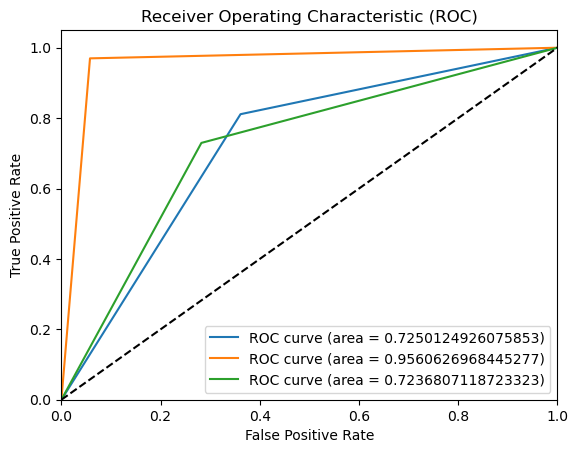

In [19]:
# 3.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

# Cargar la base de datos limpia
respondieron = pd.read_csv('respondieron_limpio.csv')

# Filtrar solo las columnas numéricas para imputación
numeric_cols = respondieron.select_dtypes(include=['number']).columns
X_numeric = respondieron[numeric_cols]

# Definir la variable dependiente
y = respondieron['pobre']

# Dividir la base de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=101)

# Imputar los valores faltantes solo en las columnas numéricas
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Inicializar los modelos
logit_model = LogisticRegression()
lda_model = LinearDiscriminantAnalysis()
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenar los modelos con los datos imputados
logit_model.fit(X_train_imputed, y_train)
lda_model.fit(X_train_imputed, y_train)
knn_model.fit(X_train_imputed, y_train)

# Realizar predicciones
y_pred_logit = logit_model.predict(X_test_imputed)
y_pred_lda = lda_model.predict(X_test_imputed)
y_pred_knn = knn_model.predict(X_test_imputed)

# Calcular la matriz de confusión para cada modelo
cm_logit = confusion_matrix(y_test, y_pred_logit)
cm_lda = confusion_matrix(y_test, y_pred_lda)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos para la curva ROC
fpr_logit, tpr_logit, _ = roc_curve(y_test, y_pred_logit)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_pred_lda)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

# Calcular el área bajo la curva ROC
auc_logit = auc(fpr_logit, tpr_logit)
auc_lda = auc(fpr_lda, tpr_lda)
auc_knn = auc(fpr_knn, tpr_knn)

# Calcular el accuracy para cada modelo
accuracy_logit = accuracy_score(y_test, y_pred_logit)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Mostrar los resultados
print("Matriz de Confusión - Regresión Logística:")
print(cm_logit)
print("Matriz de Confusión - Análisis de Discriminante Lineal:")
print(cm_lda)
print("Matriz de Confusión - KNN (k=3):")
print(cm_knn)

print("AUC - Regresión Logística:", auc_logit)
print("AUC - Análisis de Discriminante Lineal:", auc_lda)
print("AUC - KNN (k=3):", auc_knn)

print("Accuracy - Regresión Logística:", accuracy_logit)
print("Accuracy - Análisis de Discriminante Lineal:", accuracy_lda)
print("Accuracy - KNN (k=3):", accuracy_knn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_logit, tpr_logit, label=f'ROC curve (area = {auc_logit})')
plt.plot(fpr_lda, tpr_lda, label=f'ROC curve (area = {auc_lda})')
plt.plot(fpr_knn, tpr_knn, label=f'ROC curve (area = {auc_knn})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Paso 1: Entrenar el modelo

# Cargar la base respondieron
respondieron = pd.read_csv('respondieron.csv', low_memory=False)

# Crear la columna 'pobre' basado en un umbral de pobreza en la columna 'ingreso_total'
umbral_pobreza = 10000  # Ajusta este valor según tu caso
respondieron['pobre'] = respondieron['P47T'] < umbral_pobreza  # Asegúrate de usar la columna correcta para ingreso total

# Definir las características y la variable objetivo
features = ['CH04', 'CH06', 'PONDERA', 'Edad', 'adulto_equiv', 'ad_equiv_hogar']  # Ajusta según tu caso
respondieron['Edad'] = respondieron['Edad'].replace('Menor de 1 año', '0').str.replace(' años', '').astype(float)
X = respondieron[features]
y = respondieron['pobre']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# Entrenar el modelo de regresión logística
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

# Paso 2: Usar el modelo entrenado para hacer predicciones

# Cargar la base norespondieron
norespondieron = pd.read_csv('norespondieron.csv', low_memory=False)

# Definir las características utilizadas en el entrenamiento
features = ['CH04', 'CH06', 'PONDERA', 'Edad', 'adulto_equiv', 'ad_equiv_hogar']  # Ajusta según tu caso

# Manejar el valor especial 'Menor de 1 año' y convertir la columna 'Edad' a valores numéricos
norespondieron['Edad'] = norespondieron['Edad'].replace('Menor de 1 año', '0').str.replace(' años', '').astype(float)

# Preprocesar los datos de norespondieron
X_norespondieron = norespondieron[features]

# Escalar los datos usando el mismo escalador que en el entrenamiento
X_norespondieron_scaled = scaler.transform(X_norespondieron)

# Hacer predicciones
predicciones = logit_model.predict(X_norespondieron_scaled)

# Calcular la proporción de personas identificadas como pobres
proporcion_pobres = (predicciones == 1).mean()

print(f"Proporción de personas identificadas como pobres: {proporcion_pobres:.2f}")






Proporción de personas identificadas como pobres: 0.26


In [32]:
# 6.import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Paso 1: Entrenar el modelo con todas las variables disponibles

# Cargar la base respondieron
respondieron = pd.read_csv('respondieron.csv', low_memory=False)

# Crear la columna 'pobre' basado en un umbral de pobreza en la columna 'ingreso_total'
umbral_pobreza = 10000  # Ajusta este valor según tu caso
respondieron['pobre'] = respondieron['P47T'] < umbral_pobreza  # Asegúrate de usar la columna correcta para ingreso total

# Definir las características y la variable objetivo
features_all = ['CH04', 'CH06', 'PONDERA', 'Edad', 'adulto_equiv', 'ad_equiv_hogar']  # Ajusta según tu caso
respondieron['Edad'] = respondieron['Edad'].replace('Menor de 1 año', '0').str.replace(' años', '').astype(float)
X_all = respondieron[features_all]
y = respondieron['pobre']

# Escalar los datos
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all)

# Dividir en conjuntos de entrenamiento y prueba
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_scaled, y, test_size=0.3, random_state=101)

# Entrenar el modelo de regresión logística con todas las variables
logit_model_all = LogisticRegression()
logit_model_all.fit(X_train_all, y_train_all)

# Hacer predicciones y calcular medidas de precisión para el modelo con todas las variables
y_pred_all = logit_model_all.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
roc_auc_all = roc_auc_score(y_test_all, logit_model_all.predict_proba(X_test_all)[:, 1])

print(f"Precisión del modelo con todas las variables: {accuracy_all:.2f}")
print(f"AUC del modelo con todas las variables: {roc_auc_all:.2f}")

# Paso 2: Entrenar el modelo con un subconjunto de variables seleccionadas

# Definir un subconjunto de características seleccionadas
features_selected = ['CH04', 'CH06', 'PONDERA']  # Ajusta según tu criterio

# Preprocesar los datos con las variables seleccionadas
X_selected = respondieron[features_selected]

# Escalar los datos
scaler_selected = StandardScaler()
X_selected_scaled = scaler_selected.fit_transform(X_selected)

# Dividir en conjuntos de entrenamiento y prueba
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected_scaled, y, test_size=0.3, random_state=101)

# Entrenar el modelo de regresión logística con las variables seleccionadas
logit_model_selected = LogisticRegression()
logit_model_selected.fit(X_train_selected, y_train_selected)

# Hacer predicciones y calcular medidas de precisión para el modelo con las variables seleccionadas
y_pred_selected = logit_model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test_selected, logit_model_selected.predict_proba(X_test_selected)[:, 1])

print(f"Precisión del modelo con variables seleccionadas: {accuracy_selected:.2f}")
print(f"AUC del modelo con variables seleccionadas: {roc_auc_selected:.2f}")

# Comparar las precisiones
print(f"Diferencia en precisión: {accuracy_all - accuracy_selected:.2f}")
print(f"Diferencia en AUC: {roc_auc_all - roc_auc_selected:.2f}")


Precisión del modelo con todas las variables: 0.88
AUC del modelo con todas las variables: 0.92
Precisión del modelo con variables seleccionadas: 0.88
AUC del modelo con variables seleccionadas: 0.92
Diferencia en precisión: 0.01
Diferencia en AUC: 0.00
